In [ ]:
To begin, use Python and SQLAlchemy to do basic climate analysis and data exploration of your climate database. All of the following analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.

* Use the provided [starter notebook](climate_starter.ipynb) and [hawaii.sqlite](Resources/hawaii.sqlite) files to complete your climate analysis and data exploration.
* Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.
* Use SQLAlchemy `create_engine` to connect to your sqlite database.
* Use SQLAlchemy `automap_base()` to reflect your tables into classes and save a reference to those classes called `Station` and `Measurement`.


In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
#startdate = 12/29 - 1/5

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect

In [5]:
engine = create_engine("sqlite:///Homework/Instructions/Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)
inspector = inspect(engine)

In [10]:
columns=inspector.get_columns('Measurement')
for column in columns:
 print(column["name"],column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
columns=inspector.get_columns('Station')
for column in columns:
    print(column["name"],column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
engine.execute('select station,name from station').fetchall()

[('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00513117', 'KANEOHE 838.1, HI US'),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 ('USC00517948', 'PEARL CITY, HI US'),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US'),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US'),
 ('USC00519281', 'WAIHEE 837.5, HI US'),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US')]

In [13]:
engine.execute('select * from measurement ASC LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

# Exploratory Climate Analysis

In [14]:
session = Session(bind=engine)
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Use Pandas Plotting with Matplotlib to plot the data

In [15]:
# rain=session.query(Measurement.prcp, Measurement.date).filter(Measurement.station == 'USC00511918').filter(Measurement.date>= '2010-01-01').filter(Measurement.date<= '2010-12-31').all()

In [16]:
rain=session.query(Measurement.prcp, Measurement.date).filter(Measurement.station == 'USC00511918').filter(Measurement.date>= '2010-01-01').filter(Measurement.date<= '2010-12-31').order_by(Measurement.date).all()

In [17]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

[]

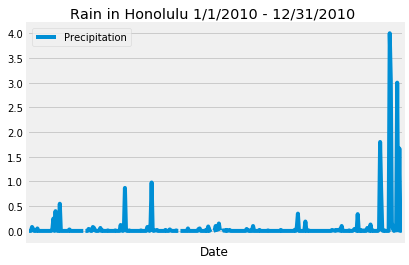

In [18]:
df = pd.DataFrame(rain, columns=['Measurement.prcp', 'Measurement.date'])
df.set_index('Measurement.date')
ax=df.plot()
ax.set_xlabel("Date")
ax.legend(["Precipitation"]);
ax.set_title("Rain in Honolulu 1/1/2010 - 12/31/2010 ")
ax.get_xaxis().set_ticks([])

# dates = [rain2[1] for rain2 in rain2]
# prcp = [int(rain2[2]) for rain2 in rain2]

# xpos = range(1, len(dates)+1)
# ax.barh(xpos, dates)
# ax.set_xticks(xpos)
# ax.set_xticklabels(prcp)

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Measurement.prcp
count,349.000000
mean,0.061117
std,0.349078
min,0.000000
25%,0.000000
50%,0.000000
75%,0.010000
max,4.000000


In [20]:
# Design a query to show how many stations are available in this dataset?
station=session.query(Station.station, Station.name).count()
station_names=session.query(Station.station, Station.name).all()
station_names

[('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00513117', 'KANEOHE 838.1, HI US'),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 ('USC00517948', 'PEARL CITY, HI US'),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US'),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US'),
 ('USC00519281', 'WAIHEE 837.5, HI US'),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US')]

In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
#MANOA LYON ARBO 785.2, HI US' has most active station
station_count=session.query(Measurement.station, Measurement.id).group_by(Measurement.station).order_by((Measurement.id).desc())
station_count.all()

[('USC00516128', 16939),
 ('USC00511918', 14960),
 ('USC00519281', 12188),
 ('USC00519523', 9519),
 ('USC00518838', 9008),
 ('USC00517948', 7636),
 ('USC00514830', 5434),
 ('USC00513117', 2725),
 ('USC00519397', 1)]

In [22]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
from sqlalchemy.sql import func
low_temp=session.query(func.min(Measurement.tobs)).filter(Measurement.station=='USC00516128').all()
low_temp

[(58.0)]

In [23]:
high_temp=session.query(func.max(Measurement.tobs)).filter(Measurement.station=='USC00516128').all()
high_temp

[(84.0)]

In [24]:
ave_temp=session.query(func.avg(Measurement.tobs)).filter(Measurement.station=='USC00516128').all()
ave_temp

[(70.91500765696784)]

In [25]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_Manoa=session.query(Measurement.station, Measurement.tobs).filter(Measurement.date>= '2010-01-01').filter(Measurement.date<= '2010-12-31').order_by(Measurement.date).all()

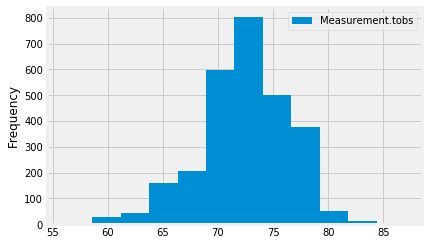

In [26]:
df2= pd.DataFrame(temp_Manoa, columns=['Measurement.station', 'Measurement.tobs'])
manoa=df2.plot.hist(bins=12)

In [57]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
 
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example

print(calc_temps('2010-12-29', '2011-01-05'))

[(61.0, 71.23333333333333, 77.0)]
